# Business Problem

A property investment firm would like to know which kind of property to invest in Melbourne, Australia so that they can better advice their potential customers. <br>

We attempt to answer the following questions: <br>

Which part of Melbourne is the most expensive? <br>
How is the price distribution in different parts of Melbourne? <br>
Other than location, what other property feature will affect the price? <br>
Example – number of rooms, bathrooms, housing type or year of build?


## Importing Libraries & Loading Datasets

In [1]:
# Dataset: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set pandas to show all columns of data
pd.set_option('display.max_columns', None)

# save filepath to variable for easier access
file_path = 'data/melb_data.csv'

# read the data and store data in DataFrame titled melbourne_data
melbourne_data_df = pd.read_csv(file_path) 

In [2]:
melbourne_data_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,NaN,3/12/2016,2.5,3067,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [3]:
melbourne_data_df.shape

(13580, 20)

In [4]:
melbourne_data_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
melbourne_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13579 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bathroom       13580 non-null  int64  
 11  Car            13518 non-null  float64
 12  Landsize       13580 non-null  int64  
 13  BuildingArea   7130 non-null   float64
 14  YearBuilt      8205 non-null   float64
 15  CouncilArea    12211 non-null  object 
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float64
 18  Region

In [6]:
melbourne_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03
Lattitude,13580.0,-3.780920e+01,0.079260,-38.18255,-37.856822,-37.802355,-3.775640e+01,-3.740853e+01


### Preliminary EDA on Dataset

The above information tells us that our dataset features consists of three datatypes. <br>
(float64, integer64, object). <br> There is a total of 13 numerical features, and 8 categorical features.

After I identified that there are indeed msissing values, the next step is to identify which rows specifically has missing values, starting with missing numerical features!

In [7]:
#Select all numerical data (By excluding object, we telling pandas we want all numerical data)
num_col = melbourne_data_df.select_dtypes(exclude='object')

# let's try to visualize the number of missing values in each numerical feature
num_col.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

And these are the missing categorical features!

In [8]:
# Select all categorical data (By excluding int64 and float64, we telling pandas we want all categorical data)
cat_col = melbourne_data_df.select_dtypes(exclude=['int64','float64'])

# let's try to visualize the number of missing values in each numerical feature
cat_col.isnull().sum()

Suburb            0
Address           0
Type              0
Method            0
SellerG           1
Date              0
CouncilArea    1369
Regionname        0
dtype: int64

I print a snippet of the rows of data which have missing fields to get an idea

In [9]:
num_col.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000,2.5,3067,1,1.0,202,NaN,NaN,-37.7996,144.9984,4019
1,2,1035000,2.5,3067,1,0.0,156,79.0,1900.0,-37.8079,144.9934,4019
2,3,1465000,2.5,3067,2,0.0,134,150.0,1900.0,-37.8093,144.9944,4019
3,3,850000,2.5,3067,2,1.0,94,NaN,NaN,-37.7969,144.9969,4019
4,4,1600000,2.5,3067,1,2.0,120,142.0,2014.0,-37.8072,144.9941,4019


### Cleaning Dataset - Filtering Outliers in column 'YearBuilt' and "CouncilArea".

In [10]:
# The minimum year in dataset was 1196.00000
melbourne_data_df = melbourne_data_df[melbourne_data_df['YearBuilt'] != 1196]

In [11]:
# Drop the rows with CouncilArea = "Unavailable"
melbourne_data_df = melbourne_data_df[melbourne_data_df["CouncilArea"].str.contains("Unavailable") == False]
melbourne_data_council = melbourne_data_df.groupby(['CouncilArea'])['Price'].median().sort_values(ascending=False)
melbourne_data_council

CouncilArea
Boroondara           1617500.0
Bayside              1550000.0
Manningham           1220000.0
Whitehorse           1147500.0
Monash               1100000.0
Yarra                1090000.0
Glen Eira            1040500.0
Stonnington          1020000.0
Kingston              940000.0
Port Phillip          920000.0
Hobsons Bay           912500.0
Moonee Valley         910000.0
Knox                  857500.0
Darebin               851000.0
Nillumbik             850000.0
Maribyrnong           816000.0
Maroondah             811500.0
Banyule               802500.0
Melbourne             779500.0
Moreland              771000.0
Greater Dandenong     683000.0
Yarra Ranges          673500.0
Frankston             640000.0
Brimbank              635400.0
Casey                 626250.0
Whittlesea            610000.0
Cardinia              601250.0
Macedon Ranges        540000.0
Hume                  539000.0
Wyndham               512000.0
Melton                460500.0
Moorabool             28500

### Cleaning Dataset - Missing Values

In [12]:
# Apply mean value imputation to fill in the missing values in the Car, BuildingArea, and YearBuilt columns
melbourne_data_df['Car'] = melbourne_data_df['Car'].fillna(melbourne_data_df['Car'].mean())
melbourne_data_df['BuildingArea'] = melbourne_data_df['BuildingArea'].fillna(melbourne_data_df['BuildingArea'].mean())
melbourne_data_df['YearBuilt'] = melbourne_data_df['YearBuilt'].fillna(melbourne_data_df['YearBuilt'].mean())

# Apply mode value imputation to fill in the missing values in the SellerG and CouncilArea column
melbourne_data_df['SellerG'] = melbourne_data_df['SellerG'].fillna(melbourne_data_df['SellerG'].mode()[0])
melbourne_data_df['CouncilArea'] = melbourne_data_df['CouncilArea'].fillna(melbourne_data_df['CouncilArea'].mode()[0])
melbourne_data_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Nelson,3/12/2016,2.5,3067,1,1.0,202,144.226275,1964.708876,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,1,0.0,156,79.000000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,2,0.0,134,150.000000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,2,1.0,94,144.226275,1964.708876,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,1,2.0,120,142.000000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


### Cleaning Dataset - Adding Details in "Type" Columns

In [13]:
# Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse;
melbourne_data_df = melbourne_data_df.replace({'h': 'House', 'u': 'Unit', 't': 'Townhouse'})
melbourne_data_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,House,1480000,S,Nelson,3/12/2016,2.5,3067,1,1.0,202,144.226275,1964.708876,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,House,1035000,S,Biggin,4/2/2016,2.5,3067,1,0.0,156,79.000000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,House,1465000,SP,Biggin,4/3/2017,2.5,3067,2,0.0,134,150.000000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,House,850000,PI,Biggin,4/3/2017,2.5,3067,2,1.0,94,144.226275,1964.708876,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,House,1600000,VB,Nelson,4/6/2016,2.5,3067,1,2.0,120,142.000000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


### Final Check on the DataFrame before Data Visualisation

In [14]:
# let's try to visualize the number of missing values in each numerical feature
melbourne_data_df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### Correlation between Price and other Feature Columns

Here I apply .corr() to study the relationship between the features and the outcome we want to predict - price

In [15]:
melbourne_data_df.corr()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.510522,0.291880,0.041205,0.590579,0.411066,0.022871,0.306993,-0.069947,0.023177,0.090671,-0.090719
Price,0.510522,1.000000,-0.146184,0.118167,0.473997,0.248639,0.038537,0.279920,-0.268685,-0.207365,0.201412,-0.037179
Distance,0.291880,-0.146184,1.000000,0.407115,0.124540,0.269297,0.016919,0.084367,0.188143,-0.134851,0.249598,-0.078276
Postcode,0.041205,0.118167,0.407115,1.000000,0.108372,0.045006,0.021273,0.039145,0.021397,-0.459274,0.484327,0.069337
Bathroom,0.590579,0.473997,0.124540,0.108372,1.000000,0.329788,0.035101,0.277525,0.116648,-0.070625,0.114713,-0.051889
Car,0.411066,0.248639,0.269297,0.045006,0.329788,1.000000,0.023330,0.162509,0.082726,0.005823,0.057199,-0.030171
Landsize,0.022871,0.038537,0.016919,0.021273,0.035101,0.023330,1.000000,0.011069,0.006984,0.005772,0.014756,-0.005531
BuildingArea,0.306993,0.279920,0.084367,0.039145,0.277525,0.162509,0.011069,1.000000,0.003419,-0.018964,0.059796,-0.035352
YearBuilt,-0.069947,-0.268685,0.188143,0.021397,0.116648,0.082726,0.006984,0.003419,1.000000,0.040479,0.002161,0.004250
Lattitude,0.023177,-0.207365,-0.134851,-0.459274,-0.070625,0.005823,0.005772,-0.018964,0.040479,1.000000,-0.350293,0.042205


In [16]:
melbourne_data_df.corr().iloc[1:2,:]

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Price,0.510522,1.0,-0.146184,0.118167,0.473997,0.248639,0.038537,0.27992,-0.268685,-0.207365,0.201412,-0.037179


Text(0.5, 1.0, 'Correlation of Property Prices for these Features')

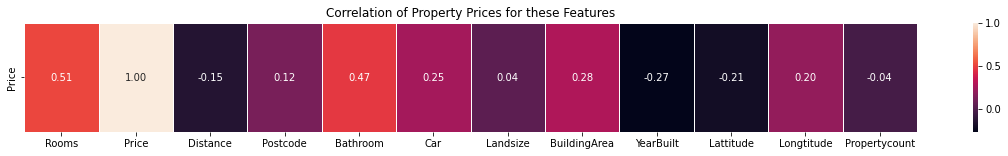

In [17]:
# Correlation map
f,ax = plt.subplots(figsize=(20,2))
sns.heatmap(melbourne_data_df.corr().iloc[1:2,:], annot=True, linewidths=.8, fmt= '.2f',ax=ax)
plt.title("Correlation of Property Prices for these Features")

By using the heatmap to corroborate with the table of correlation between price and the various features, it is evident the features with the highest correlation with sale price are (defined as values with a correlation of around 0.4 in this case): Rooms, Bedroom2, Bathroom <br>

### Overview of the Price Column

In [18]:
melbourne_data_df['Price'].describe()

count    1.220900e+04
mean     1.063659e+06
std      6.389081e+05
min      8.500000e+04
25%      6.400000e+05
50%      8.950000e+05
75%      1.320000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [19]:
# Format the column Price to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.0f' % x)
melbourne_data_df['Price'].describe()

count     12209
mean    1063659
std      638908
min       85000
25%      640000
50%      895000
75%     1320000
max     9000000
Name: Price, dtype: float64

Observations: <br>
Our target feature is a continuous variable with values ranging from 85,000 to 9,000,000. <br>
The average sale price of all the houses in our dataset is 1,063,659.

### Analysis of features against sale price

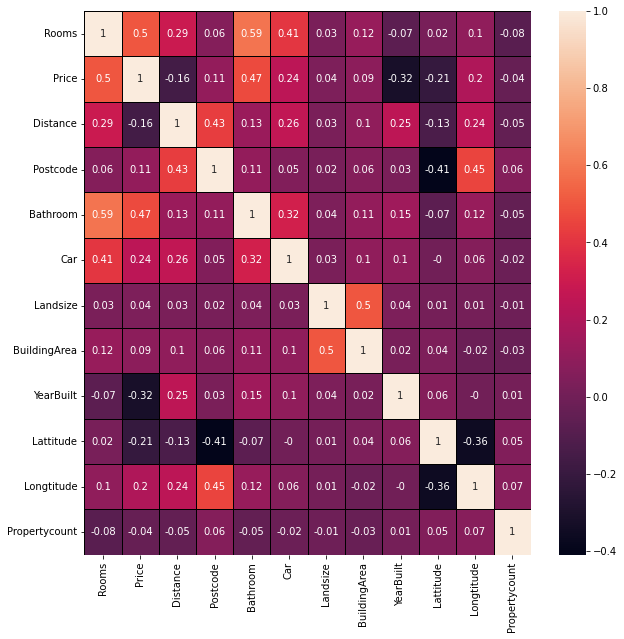

In [20]:
# Creating a heat map of all the numerical features.
plt.figure(figsize=(10,10))
mat = np.round(num_col.corr(), decimals=2)
sns.heatmap(data=mat, linewidths=1, linecolor='black',annot=True);

In [21]:
# Getting features that have a correlation value greater than 0.4 against sale price.
for val in range(len(mat['Price'])):
    if abs(mat['Price'].iloc[val]) > 0.4:
        print(mat['Price'].iloc[val:val+1]) 

Rooms   0
Name: Price, dtype: float64
Price   1
Name: Price, dtype: float64
Bathroom   0
Name: Price, dtype: float64


Observation: Rooms,Bedroom2,Bathroom are highly correlated with price

### Analysis by Regional features

In [22]:
# Tabular format for Analysis by Regional
melbourne_data_reg = melbourne_data_df.groupby(['Regionname'])['Price'].agg({"count", "median", "min", "max", "mean"}).sort_values(by="median", ascending=False)
melbourne_data_reg

,count,min,max,mean,median
Regionname,,,,,
Southern Metropolitan,4339,131000,8000000,1338721,1206000
Eastern Metropolitan,1228,288000,4000000,1087686,986750
Northern Metropolitan,3554,145000,4525000,896672,805000
South-Eastern Metropolitan,325,266000,9000000,901530,805000
Western Metropolitan,2668,85000,3900000,864937,795500
Eastern Victoria,44,400000,1085000,688204,653000
Northern Victoria,26,330000,898000,559750,533000
Western Victoria,25,280500,550000,382910,385000


In [23]:
region_order = melbourne_data_reg.iloc[::1].index
region_order

Index(['Southern Metropolitan', 'Eastern Metropolitan',
       'Northern Metropolitan', 'South-Eastern Metropolitan',
       'Western Metropolitan', 'Eastern Victoria', 'Northern Victoria',
       'Western Victoria'],
      dtype='object', name='Regionname')

From the above we can understand that which are the council area belongs to the region area and the above will help the people to find out the proper area and its price.it may help the buyer to select the proper area within his budget.

Text(0.5, 1.0, 'Boxplot of Melbourne Housing Prices by Regions')

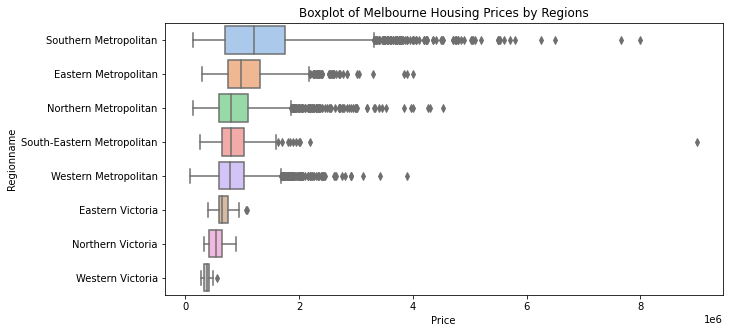

In [24]:
# Analysis by Regional features
plt.figure(figsize=(10,5))
sns.boxplot(y=melbourne_data_df['Regionname'],x=melbourne_data_df['Price'], 
            order=region_order, palette="pastel")
plt.ylabel('Regionname')
plt.title("Boxplot of Melbourne Housing Prices by Regions")

Text(0.5, 1.0, 'Countplot of Melbourne Housing by Regions')

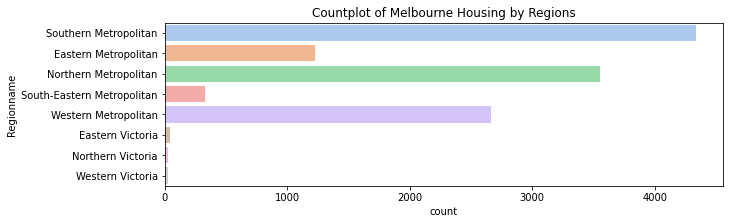

In [25]:
plt.figure(figsize=(10,3))
sns.countplot(data=melbourne_data_df,y=melbourne_data_df['Regionname'], 
             order=region_order, palette="pastel")
plt.ylabel('Regionname')
plt.title("Countplot of Melbourne Housing by Regions")

Observations: <br>
From the graph, we can see that from region wise graph Southern Metropolitan has the highest price and even the median is also high

In [26]:
# Drop the rows with CouncilArea = "Unavailable"
melbourne_data_df = melbourne_data_df[melbourne_data_df["CouncilArea"].str.contains("Unavailable") == False]

Text(0.5, 1.0, 'Price Analysis by Region and Housing Type')

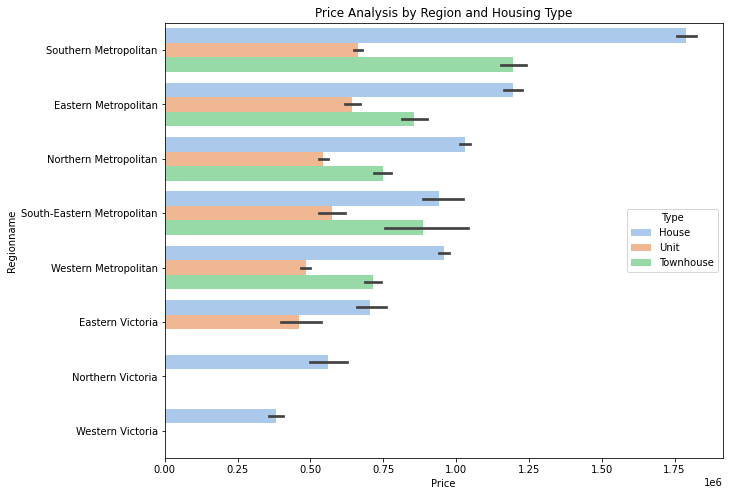

In [27]:
# We can analyse the price and type by region wise
plt.figure(figsize=(10,8))
sns.barplot(x=melbourne_data_df['Price'],y=melbourne_data_df['Regionname'],
            hue=melbourne_data_df['Type'],order=region_order, palette='pastel');
plt.title("Price Analysis by Region and Housing Type")

Observations: 
1. Prices for all House type is the highest in South Metropolitan. <br>
2. Prices for all House type is the lowest in South Metropolitan. <br>
3. There is only House type in Northern & Western Victoria while Eastern Victoria area has Unit type, suggesting that Eastern Victoria might be better developed (in construction wise).

## Further Analysis on South Metropolitan vs West Metropolitan

### 1a) Analysis by Council in Southern Metropolitan

In [28]:
# Further Analysis on South Metropolitan

melbourne_data_df_smetro = melbourne_data_df[(melbourne_data_df['Regionname'] == 'Southern Metropolitan')]
melbourne_data_df_smetro.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
78,Albert Park,105 Kerferd Rd,2,House,1275000,S,hockingstuart,3/9/2016,3,3206,1,0,120,82,1900,Port Phillip,-38,145,Southern Metropolitan,3280
79,Albert Park,85 Richardson St,2,House,1455000,S,Thomson,3/9/2016,3,3206,1,0,159,144,1965,Port Phillip,-38,145,Southern Metropolitan,3280
80,Albert Park,112 Beaconsfield Pde,3,House,2850000,PI,Buxton,4/3/2017,3,3206,2,0,211,198,1890,Port Phillip,-38,145,Southern Metropolitan,3280
81,Albert Park,94 Graham St,3,House,1850000,S,Greg,4/3/2017,3,3206,2,0,128,133,1890,Port Phillip,-38,145,Southern Metropolitan,3280
82,Albert Park,396 Montague St,2,House,1436000,S,RT,4/3/2017,3,3206,1,0,130,81,1900,Port Phillip,-38,145,Southern Metropolitan,3280


In [29]:
# Tabular format for Analysis by CouncilArea
melbourne_data_scouncil = melbourne_data_df_smetro.groupby(['CouncilArea'])['Price'].agg({"count", "median", "min", "max", "mean"}).sort_values(by="median", ascending=False)
melbourne_data_scouncil

,count,min,max,mean,median
CouncilArea,,,,,
Boroondara,1159,160000,8000000,1646740,1615000
Bayside,489,290000,5800000,1652168,1550000
Whitehorse,111,550000,2630000,1297237,1253500
Monash,187,305000,2525000,1091499,1060000
Glen Eira,848,131000,3000000,1069279,1040500
Stonnington,719,240000,6250000,1293382,1020000
Kingston,92,240000,1740000,990965,993500
Port Phillip,628,275000,5600000,1144346,920000
Melbourne,106,260800,3000000,920908,720000


Text(0.5, 1.0, 'Boxplots of Price Analysis by CouncilArea across Southern Metropolitan')

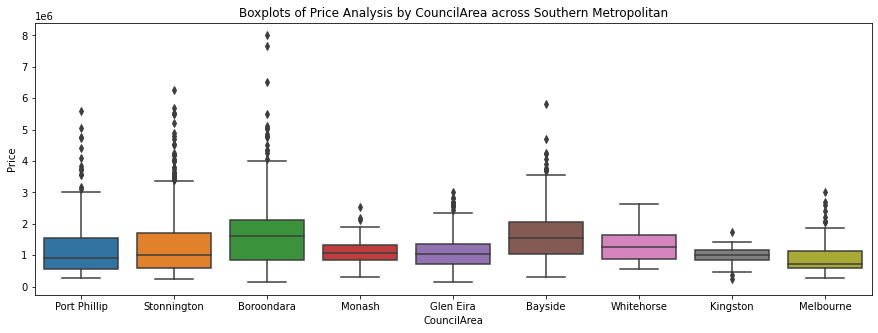

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(x=melbourne_data_df_smetro['CouncilArea'],y=melbourne_data_df_smetro['Price'])
plt.title("Boxplots of Price Analysis by CouncilArea across Southern Metropolitan")

Text(0.5, 1.0, 'Countplots by CouncilArea across Southern Metropolitan')

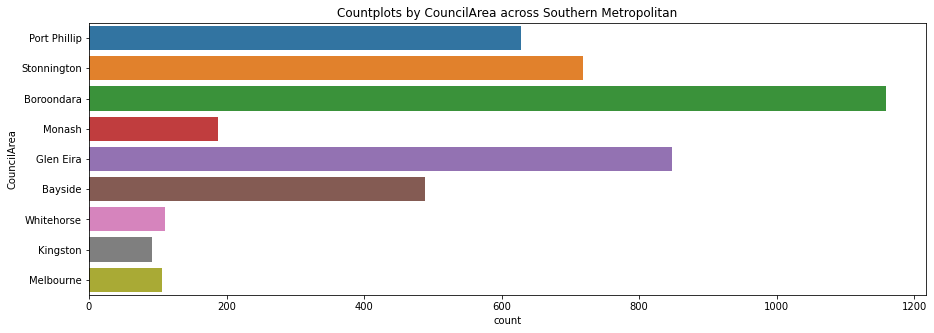

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(data=melbourne_data_df_smetro,y=melbourne_data_df_smetro['CouncilArea'])
plt.title("Countplots by CouncilArea across Southern Metropolitan")

Observations:<br>
The highest frequency is from Boroondara which has a median price of 1.6M.<br>
The lowest frequency is from Kingston which has a median price less than 1M.

### 1b) Analysis by Room Features in South Metropolitan

In [32]:
smetro_room_pivot = pd.pivot_table(melbourne_data_df_smetro, values='Price', index='Rooms', columns='Bathroom', 
                            aggfunc=['median', 'count'], fill_value=0, dropna=True, margins=True)
smetro_room_pivot.style.set_properties(**{'border-color': 'black','border-style' :'solid',
                                          'border-width': '1px','border-collapse':'collapse'})

smetro_room_pivot

median                                                        \
Bathroom        0        1        2        3        4        5        6   
Rooms                                                                     
1          760500   400000  1007500        0        0        0        0   
2          780000   690000   845000  1200000        0        0        0   
3         1072000  1310000  1405000  1730000  2975400  1510000  2020000   
4         1475000  1645500  1800000  2150000  2860000        0        0   
5               0  2160000  1945000  2400000  3250000  3207000  3400000   
6               0  1900000  1833000  2000000  2950000        0  6500000   
7               0        0  1350000  1802500  2846000        0        0   
8               0        0        0  1880000        0        0        0   
All        857000   770000  1482500  2160000  3050000  3183500  3400000   

                                   count                                    \
Bathroom        7        8     All     0     1     2    3   4   5  6  7  8   
Rooms                                                                        
1               0        0  400000     1   335     4    0   0   0  0  0  0   
2               0        0  710000    13  1205   229    5   0   0  0  0  0   
3               0        0 1385000     5   601   828   52   4   1  1  0  0   
4               0        0 1850000     2    88   482  205  22   0  0  0  0   
5         3900000        0 2350000     0     7    82   94  27  13  1  1  0   
6               0        0 2000000     0     1     6   11   4   0  1  0  0   
7               0        0 1642000     0     0     1    2   2   0  0  0  0   
8         2950000  2200000 2200000     0     0     0    1   0   0  0  1  1   
All       3425000  2200000 1206000    21  2237  1632  370  59  14  3  2  1   

                
Bathroom   All  
Rooms           
1          340  
2         1452  
3         1492  
4          799  
5          225  
6           23  
7            5  
8            3  
All       4339

Text(0.5, 1.0, 'Boxplots of Price Analysis by Number of Rooms across Southern Metropolitan')

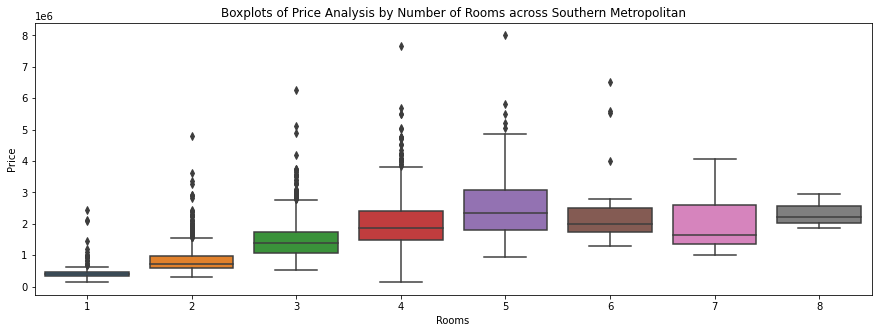

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(x=melbourne_data_df_smetro['Rooms'],y=melbourne_data_df_smetro['Price'])
plt.title("Boxplots of Price Analysis by Number of Rooms across Southern Metropolitan")

Text(0.5, 1.0, 'Countplots by Number of Rooms across Southern Metropolitan')

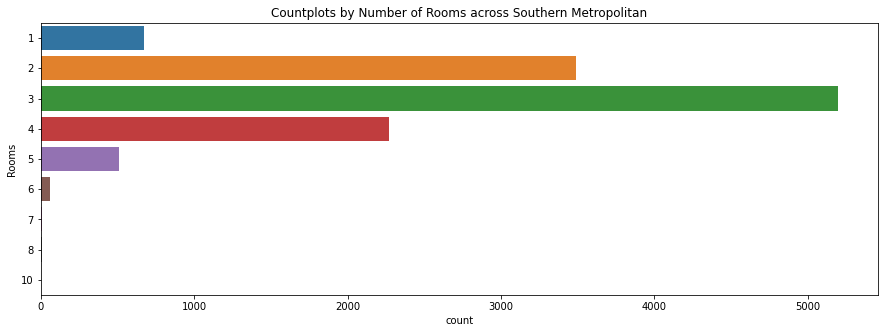

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(data=melbourne_data_df_smetro,y=melbourne_data_df['Rooms'])
plt.title("Countplots by Number of Rooms across Southern Metropolitan")

Observations: <br>
1. The highest frequency is from 3 room which has a median price of less than 1.5M. <br>
2. The lowest frequency is from 5 room which has a median price around 2.35M. <br>
3. Properties with 7 rooms has a high proportion in the upper quartile beyond the median price. <br>

### 1c) Analysis by Price and Bathroom in South Metropolitan

Text(0.5, 1.0, 'Boxplots of Price Analysis by Number of Bathroom across Southern Metropolitan')

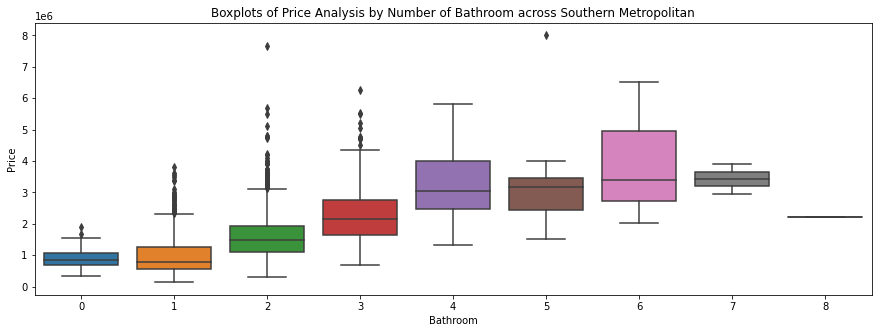

In [35]:
# Further Analysis on South Metropolitan
plt.figure(figsize=(15,5))
sns.boxplot(x=melbourne_data_df_smetro['Bathroom'],y=melbourne_data_df_smetro['Price'])
plt.title("Boxplots of Price Analysis by Number of Bathroom across Southern Metropolitan")

Text(0.5, 1.0, 'Countplots by Number of Bathrooms across Southern Metropolitan')

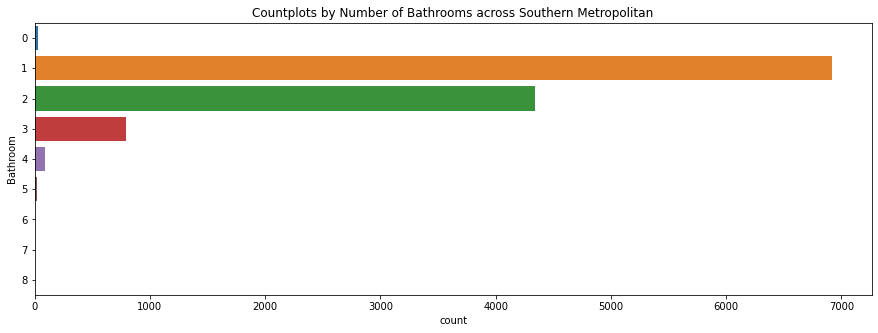

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(data=melbourne_data_df_smetro,y=melbourne_data_df['Bathroom'])
plt.title("Countplots by Number of Bathrooms across Southern Metropolitan")

Observations:
1. The highest frequency is from 1 bath which has a median price of less than 1.0M.<br> 
2. The lowest frequency is from 5 room which has a median price around 3.2M. <br>
3. Properties with 7 rooms has a high proportion in the upper quartile beyond the median price.

### 1d) Property Transactions in Southern Metropolitan

In [37]:
import folium
from folium.plugins import HeatMap

# Melbourne latitude and longitude values
latitude = -37.8
longitude = 145.03

# create map and display it

mel_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# List comprehension to make out list of lists
heat_data = [[row['Lattitude'],row['Longtitude']] for index, row in melbourne_data_df_smetro.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(mel_map)

# Display the map
mel_map

# Further Analysis on West Metropolitan

### 1a) Analysis by CouncilArea in West Metropolitan

In [38]:
# Further Analysis on West Metropolitan

melbourne_data_df_wmetro = melbourne_data_df[(melbourne_data_df['Regionname'] == 'Western Metropolitan')]
melbourne_data_df_wmetro.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
38,Airport West,154 Halsey Rd,3,Townhouse,840000,PI,Nelson,3/9/2016,14,3042,2,1,303,225,2016,Moonee Valley,-38,145,Western Metropolitan,3464
39,Airport West,50 Bedford St,3,House,730000,VB,Nelson,3/12/2016,14,3042,2,1,0,145,1965,Moonee Valley,-38,145,Western Metropolitan,3464
40,Airport West,50 Bedford St,3,House,770000,SP,Nelson,4/3/2017,14,3042,2,1,0,145,1965,Moonee Valley,-38,145,Western Metropolitan,3464
41,Airport West,23 Hart St,2,House,603000,S,Nelson,4/3/2017,14,3042,1,1,272,84,1950,Moonee Valley,-38,145,Western Metropolitan,3464
42,Airport West,1/80 Hawker St,3,Townhouse,700000,S,Brad,4/3/2017,14,3042,2,2,239,134,2009,Moonee Valley,-38,145,Western Metropolitan,3464


In [39]:
# Tabular format for Analysis by CouncilArea
melbourne_data_wcouncil = melbourne_data_df_wmetro.groupby(['CouncilArea'])['Price'].agg({"count", "median", "min", "max", "mean"}).sort_values(by="median", ascending=False)
melbourne_data_wcouncil

,count,min,max,mean,median
CouncilArea,,,,,
Hobsons Bay,434,285000,3420000,1000933,912500
Moonee Valley,938,222000,3900000,995706,911500
Maribyrnong,692,85000,2450000,811699,816000
Moreland,21,390000,990000,684405,700000
Brimbank,424,145000,1350500,647201,635400
Melton,33,340000,1150000,609435,600000
Hume,40,300000,895000,573638,583000
Wyndham,86,302500,1305000,531813,512000


Text(0.5, 1.0, 'Boxplots of Price Analysis by CouncilArea across West Metropolitan')

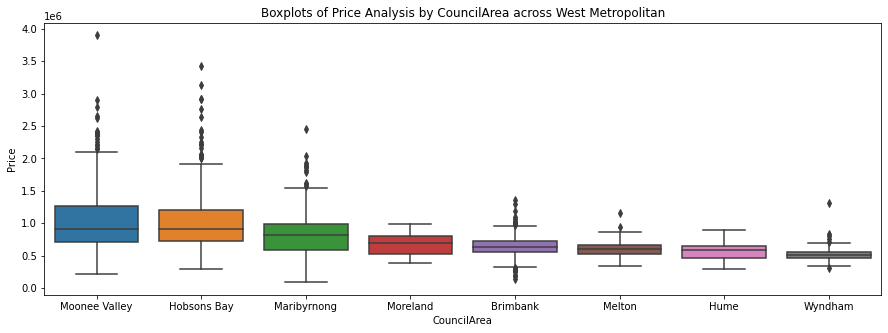

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x=melbourne_data_df_wmetro['CouncilArea'],y=melbourne_data_df_wmetro['Price'])
plt.title("Boxplots of Price Analysis by CouncilArea across West Metropolitan")

Text(0.5, 1.0, 'Countplots by CouncilArea across West Metropolitan')

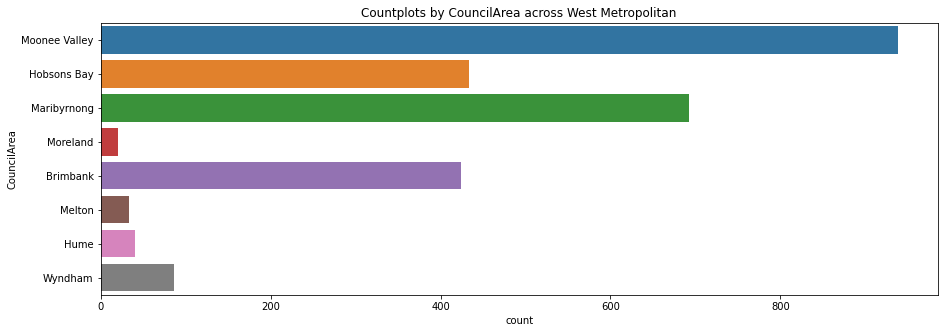

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(data=melbourne_data_df_wmetro,y=melbourne_data_df_wmetro['CouncilArea'])
plt.title("Countplots by CouncilArea across West Metropolitan")

### 1b) Analysis by Room Features in West Metropolitan

In [42]:
wmetro_room_pivot = pd.pivot_table(melbourne_data_df_wmetro, values='Price', index='Rooms', columns='Bathroom', 
                            aggfunc=['median', 'count'], fill_value=0, dropna=True, margins=True)
wmetro_room_pivot.style.set_properties(**{'border-color': 'black','border-style' :'solid',
                                          'border-width': '1px','border-collapse':'collapse'})
wmetro_room_pivot

median                                                      count  \
Bathroom       0        1        2        3        4        5     All     0   
Rooms                                                                         
1              0   310000  1720000        0        0        0  310000     0   
2         510000   600000   575000        0        0        0  597500     2   
3         702000   805000   820000   935000   485000        0  815000     1   
4              0   950000   935000  1185000  2400000  1200000  970000     0   
5              0  1730000   990000  1490000  2800000  1150000 1300000     0   
6              0        0  1090000  2150000  1777500        0 1430000     0   
7              0        0  1300000  2000000        0        0 1650000     0   
8              0        0   881000        0        0        0  881000     0   
All       610000   725000   837000  1225000  2400000  1175000  795500     3   

                                      
Bathroom     1    2    3  4  5   All  
Rooms                                 
1           81    1    0  0  0    82  
2          530   55    0  0  0   587  
3          818  519   44  1  0  1383  
4          109  321   74  3  1   508  
5            3   47   40  1  1    92  
6            0    4    7  2  0    13  
7            0    1    1  0  0     2  
8            0    1    0  0  0     1  
All       1541  949  166  7  2  2668

Text(0.5, 1.0, 'Boxplots of Price Analysis by Number of Rooms across Western Metropolitan')

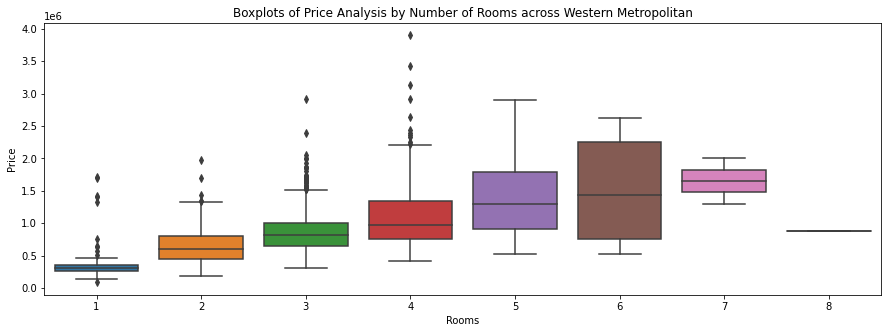

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(x=melbourne_data_df_wmetro['Rooms'],y=melbourne_data_df_wmetro['Price'])
plt.title("Boxplots of Price Analysis by Number of Rooms across Western Metropolitan")

Text(0.5, 1.0, 'Countplots by Number of Rooms across Western Metropolitan')

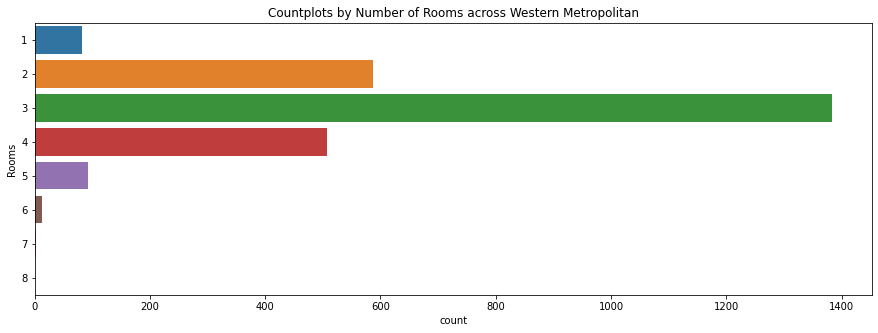

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(data=melbourne_data_df_wmetro,y=melbourne_data_df_wmetro['Rooms'])
plt.title("Countplots by Number of Rooms across Western Metropolitan")

Observations: <br>
1. The highest frequency is from 3 room which has a median price of approx 800K. <br>
2. The lowest frequency is from 6 room which has a median price around 2.35M. <br>
3. Properties with 7 rooms has a high proportion in the upper quartile beyond the median price. <br>

### b) Analysis by Price and Bathroom in West Metropolitan

Text(0.5, 1.0, 'Boxplots of Price Analysis by Number of Bathroom across Western Metropolitan')

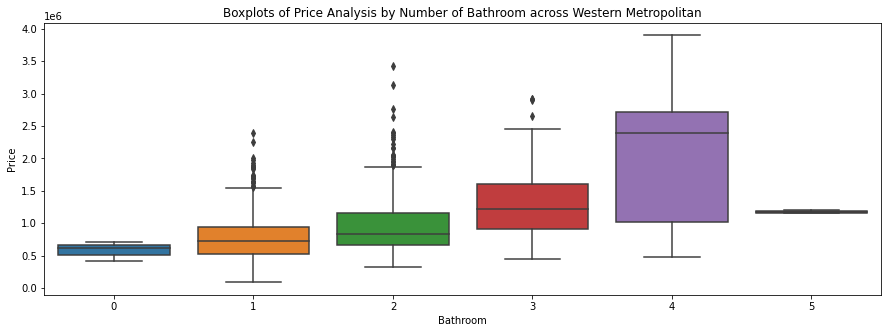

In [45]:
# Further Analysis on Western Metropolitan
plt.figure(figsize=(15,5))
sns.boxplot(x=melbourne_data_df_wmetro['Bathroom'],y=melbourne_data_df_wmetro['Price'])
plt.title("Boxplots of Price Analysis by Number of Bathroom across Western Metropolitan")

Text(0.5, 1.0, 'Countplots by Number of Bathrooms across Western Metropolitan')

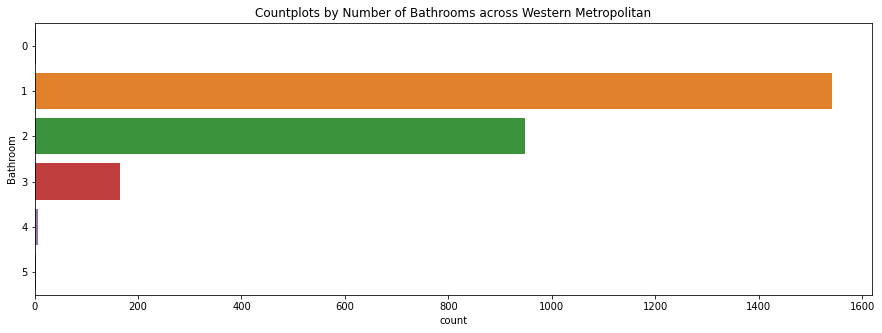

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(data=melbourne_data_df_wmetro,y=melbourne_data_df_wmetro['Bathroom'])
plt.title("Countplots by Number of Bathrooms across Western Metropolitan")

Observations: <br>
The highest frequency is from 1 bath which has a median price of 725K. <br> 
The lowest frequency is from 5 bath which has a median price around 1.2M <br> 
Properties with 4 bath has a high IQR from its median price of 2.4M.

### 1d) Property Transactions in West Metropolitan

In [47]:
import folium
from folium.plugins import HeatMap

# Melbourne latitude and longitude values
latitude = -37.8
longitude = 145.03

# create map and display it

mel_map2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# List comprehension to make out list of lists
heat_data = [[row['Lattitude'],row['Longtitude']] for index, row in melbourne_data_df_wmetro.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(mel_map2)

# Display the map
mel_map2